In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data

r3d0 = pd.read_csv("island-data-bottle-round-3/prices_round_3_day_0.csv",sep=";")
r3d1 = pd.read_csv("island-data-bottle-round-3/prices_round_3_day_1.csv",sep=";")
r3d2 = pd.read_csv("island-data-bottle-round-3/prices_round_3_day_2.csv",sep=";")

In [3]:
def update_timestamp(df):
    df['timestamp'] = df['day']*100*10000+df['timestamp']
    df.drop(['day'], axis = 1, inplace = True)
    return df.copy()

r3d0 = update_timestamp(r3d0)
r3d1 = update_timestamp(r3d1)
r3d2 = update_timestamp(r3d2)

r3 = pd.concat([r3d0, r3d1, r3d2], axis=0).reset_index(drop=True)


In [4]:
r3.head(8)

,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,DIVING_GEAR,99999.0,6.0,99998.0,19.0,NaN,NaN,100001.0,6.0,100002.0,19.0,NaN,NaN,100000.0,0.0
1,0,PEARLS,9998.0,1.0,9995.0,30.0,NaN,NaN,10005.0,30.0,NaN,NaN,NaN,NaN,10001.5,0.0
2,0,COCONUTS,8113.0,205.0,NaN,NaN,NaN,NaN,8116.0,205.0,NaN,NaN,NaN,NaN,8114.5,0.0
3,0,BERRIES,3997.0,19.0,3996.0,58.0,NaN,NaN,4003.0,19.0,4005.0,58.0,NaN,NaN,4000.0,0.0
4,0,BANANAS,4893.0,1.0,4892.0,30.0,NaN,NaN,4899.0,30.0,NaN,NaN,NaN,NaN,4896.0,0.0
5,0,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,0.0
6,0,PINA_COLADAS,15225.0,82.0,NaN,NaN,NaN,NaN,15228.0,82.0,NaN,NaN,NaN,NaN,15226.5,0.0
7,100,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,0.0


In [5]:
def plot_orderbook_dist(df,ticker = 'BANANAS'):
    
    plt.plot(df[df['product']==ticker]['bid_volume_1'],df[df['product']==ticker]['ask_volume_1'],'.')
    plt.title(ticker+' orderbook best bid and ask volume scatter')
    plt.xlabel('bid_volume_1')
    plt.ylabel('ask_volume_1')
    plt.show()

## General EDA

In [6]:
def plot_mid_price(df,ticker_1,ticker_2):
    df['mid_price'] = (df['bid_price_1']+df['ask_price_1'])/2
    fig,ax1 = plt.subplots(figsize=(20,10))
    ax1.plot(df[df['product']==ticker_1]['timestamp'],df[df['product']==ticker_1]['mid_price'],'darkblue')
    ax1.set_xlabel('time')
    ax1.set_ylabel(ticker_1+' mid price',color='b')
    ax1.tick_params('y',colors='b')
    if ticker_1 =='BERRIES':
        # plot vertical lines when timestamp = 500*1000
        ax1.axvline(x = 250*1000, color = 'g')
        ax1.axvline(x=500*1000, color='r', linestyle='--')
        ax1.axvline(x=750*1000, color='g', linestyle='--')
        ax1.axvline(x=1000*1000, color='r', linestyle='--')
        ax1.axvline(x=1250*1000, color='g', linestyle='--')
        ax1.axvline(x=1500*1000, color='r', linestyle='--')
        ax1.axvline(x=1750*1000, color='g', linestyle='--')
        ax1.axvline(x=2000*1000, color='r', linestyle='--')
        ax1.axvline(x=2250*1000, color='g', linestyle='--')
        ax1.axvline(x=2500*1000, color='r', linestyle='--')
        ax1.axvline(x=2750*1000, color='g', linestyle='--')
        return 
    if ticker_2 == None:
        plt.show()
        return
    else:
        ax2 = ax1.twinx()
        ax2.plot(df[df['product']==ticker_2]['timestamp'],df[df['product']==ticker_2]['mid_price'],'green')
        ax2.set_ylabel(ticker_2+' mid price',color='g')
        ax2.tick_params('y',colors='g')

        fig.tight_layout()
        plt.show()
        return

### our new products
- DIVING_GEAR
- BERRIES
- DOLPHIN_SIGHTINGS（observations）, not a tradeable product


In [7]:
r3.head(10)

,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,DIVING_GEAR,99999.0,6.0,99998.0,19.0,NaN,NaN,100001.0,6.0,100002.0,19.0,NaN,NaN,100000.0,0.000000
1,0,PEARLS,9998.0,1.0,9995.0,30.0,NaN,NaN,10005.0,30.0,NaN,NaN,NaN,NaN,10001.5,0.000000
2,0,COCONUTS,8113.0,205.0,NaN,NaN,NaN,NaN,8116.0,205.0,NaN,NaN,NaN,NaN,8114.5,0.000000
3,0,BERRIES,3997.0,19.0,3996.0,58.0,NaN,NaN,4003.0,19.0,4005.0,58.0,NaN,NaN,4000.0,0.000000
4,0,BANANAS,4893.0,1.0,4892.0,30.0,NaN,NaN,4899.0,30.0,NaN,NaN,NaN,NaN,4896.0,0.000000
5,0,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,0.000000
6,0,PINA_COLADAS,15225.0,82.0,NaN,NaN,NaN,NaN,15228.0,82.0,NaN,NaN,NaN,NaN,15226.5,0.000000
7,100,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,0.000000
8,100,BERRIES,3996.0,12.0,3995.0,59.0,NaN,NaN,4003.0,12.0,4004.0,59.0,NaN,NaN,3999.5,20.396484
9,100,DIVING_GEAR,99999.0,5.0,99998.0,12.0,NaN,NaN,100001.0,5.0,100002.0,12.0,NaN,NaN,100000.0,0.000000


### General Volume imbalance and future price movement for
- BANANAS
- PEARLS
- BERRIES

In [8]:
def calculate_volume_imbalance(df,level = 1):

    df['volume_imbalance_'+str(level)] = np.arctan((df['bid_volume_'+str(level)] - df['ask_volume_'+str(level)])/(df['bid_volume_'+str(level)] + df['ask_volume_'+str(level)]))*4/np.pi
    # df['volume_imbalance_'+str(level)].fillna(0,inplace=True)
    return df.copy()

def cal_orderbook_imbalance_status(df):
    df['imbalance_status'] = 0
    
    df.loc[(df['bid_volume_1']>15) & (df['ask_volume_1']>15) & (df['product']=='BANANAS'),'imbalance_status'] = 10 # high liquidity on both sides
    df.loc[(df['bid_volume_1']<=15) & (df['ask_volume_1']>15) & (df['product']=='BANANAS'),'imbalance_status'] = -1 # low liquidity on the bid side, tend to have a negative price movement
    df.loc[(df['bid_volume_1']>15) & (df['ask_volume_1']<=15) & (df['product']=='BANANAS'),'imbalance_status'] = 1 # low liquidity on the ask side, tend to have a positive price movement
    df.loc[(df['bid_volume_1']<=15) & (df['ask_volume_1']<=15) & (df['product']=='BANANAS'),'imbalance_status'] = 0 # low liquidity on both sides

    df.loc[(df['bid_volume_1']>15) & (df['ask_volume_1']>15) & (df['product']=='PEARLS'),'imbalance_status'] = 10
    df.loc[(df['bid_volume_1']<=15) & (df['ask_volume_1']>15) & (df['product']=='PEARLS'),'imbalance_status'] = -1
    df.loc[(df['bid_volume_1']>15) & (df['ask_volume_1']<=15) & (df['product']=='PEARLS'),'imbalance_status'] = 1
    df.loc[(df['bid_volume_1']<=15) & (df['ask_volume_1']<=15) & (df['product']=='PEARLS'),'imbalance_status'] = 0

    df.loc[(df['bid_volume_1']>10) & (df['ask_volume_1']>10) & (df['product']=='DIVING_GEAR'),'imbalance_status'] = 10
    df.loc[(df['bid_volume_1']<=10) & (df['ask_volume_1']>10) & (df['product']=='DIVING_GEAR'),'imbalance_status'] = -1
    df.loc[(df['bid_volume_1']>10) & (df['ask_volume_1']<=10) & (df['product']=='DIVING_GEAR'),'imbalance_status'] = 1
    df.loc[(df['bid_volume_1']<=10) & (df['ask_volume_1']<=10) & (df['product']=='DIVING_GEAR'),'imbalance_status'] = 0

    df.loc[(df['bid_volume_1']>40) & (df['ask_volume_1']>40) & (df['product']=='BERRIES'),'imbalance_status'] = 10
    df.loc[(df['bid_volume_1']<=40) & (df['ask_volume_1']>40) & (df['product']=='BERRIES'),'imbalance_status'] = -1
    df.loc[(df['bid_volume_1']>40) & (df['ask_volume_1']<=40) & (df['product']=='BERRIES'),'imbalance_status'] = 1
    df.loc[(df['bid_volume_1']<=40) & (df['ask_volume_1']<=40) & (df['product']=='BERRIES'),'imbalance_status'] = 0

    
    return df.copy()

def calculate_future_mid_price_movement(df, window_size = 9):
    for ticker in df['product'].unique():
        for i in range(window_size+1):
            df.loc[df['product'] == ticker, 'future_mid_price_move_'+str(i)] = df[df['product'] == ticker]['mid_price'].diff(i).shift(-i)

    return df.copy()

def plot_em_am(df,ticker,signal):
    temp = df[df['product'] == ticker]
    fig, axs = plt.subplots(3, 3, figsize=(20, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i in range(9):
        axs[i].plot(temp[signal],temp['future_mid_price_move_'+str(i+1)],'o')
        axs[i].set_title("Correlation between future_mid_price_move_"+str(i+1)+"\n and signal: %.2f"%temp['future_mid_price_move_'+str(i+1)].corr(temp[signal]))
        axs[i].set_xlabel('signal')
        axs[i].set_ylabel('future_mid_price_move_step_'+str(i+1))
    plt.show()
    return 0


def print_status_count(df):
    # print the percentage and count of each imbalance status for each ticker
    for ticker in df['product'].unique():
        temp = df[df['product'] == ticker]
        print(ticker)
        print(temp['imbalance_status'].value_counts(normalize=True))
        print('')

In [9]:
r3_w_move = r3.pipe(calculate_volume_imbalance,level = 1).pipe(calculate_volume_imbalance,level = 2).pipe(calculate_future_mid_price_movement,window_size = 9).pipe(cal_orderbook_imbalance_status)

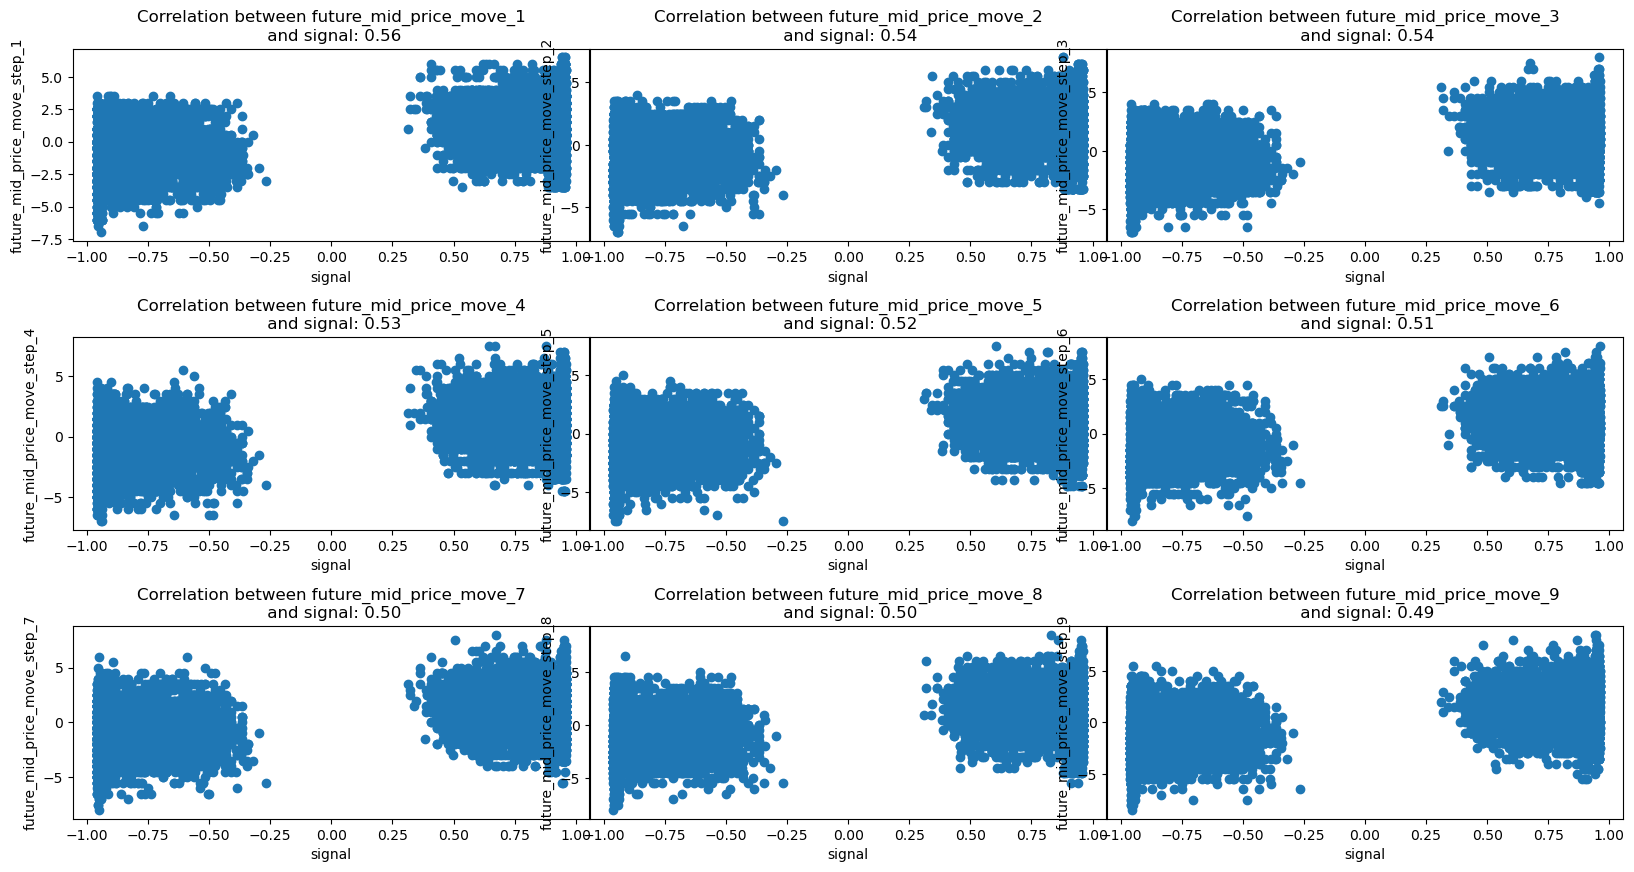

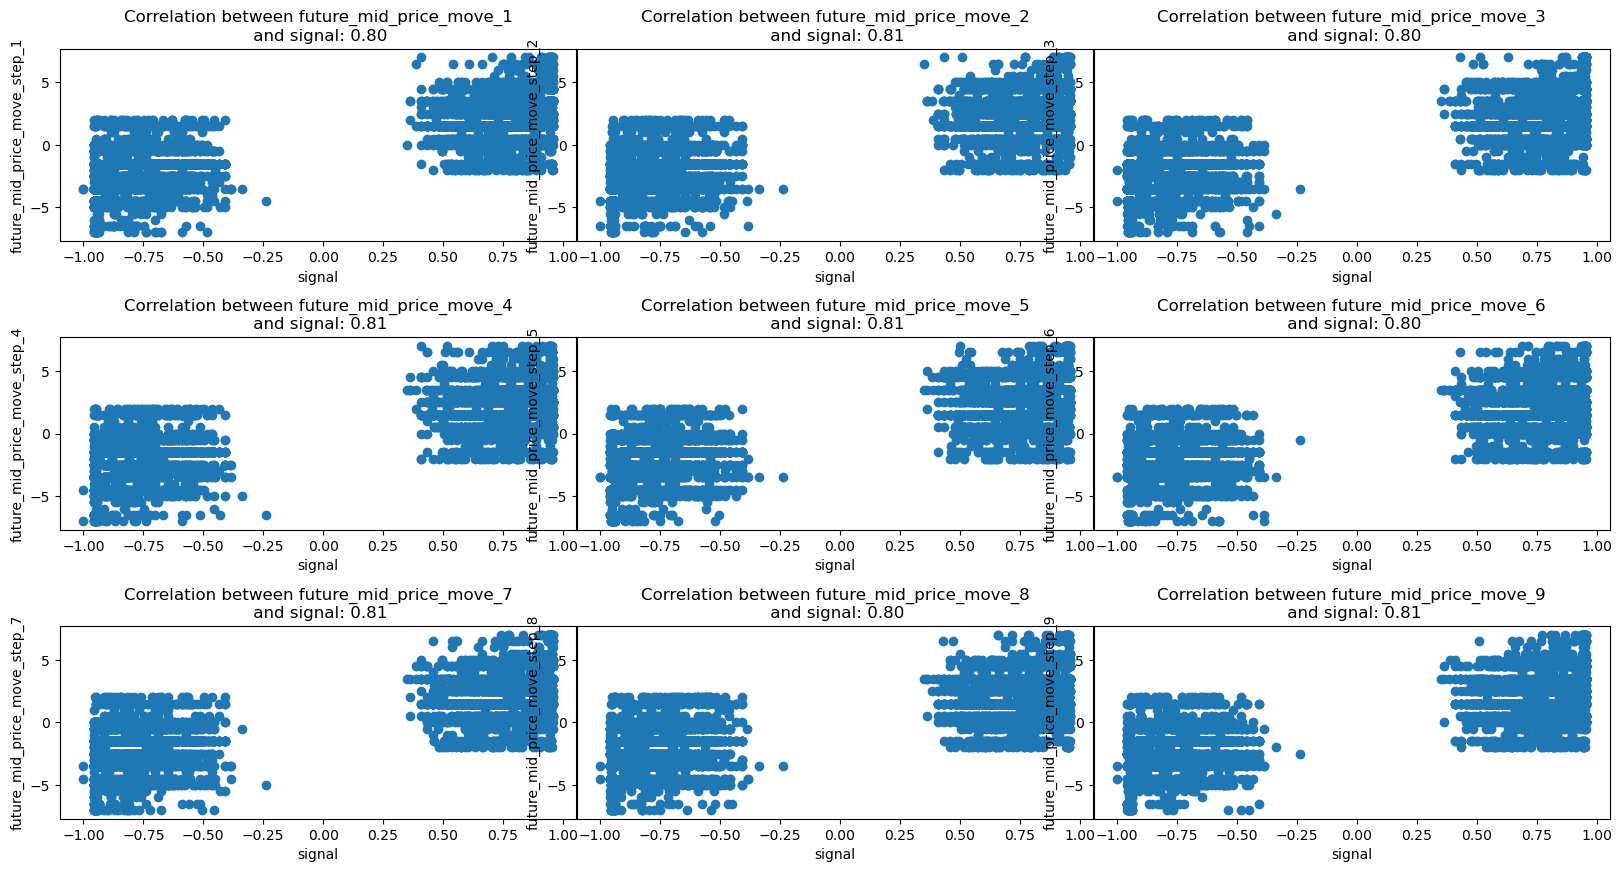

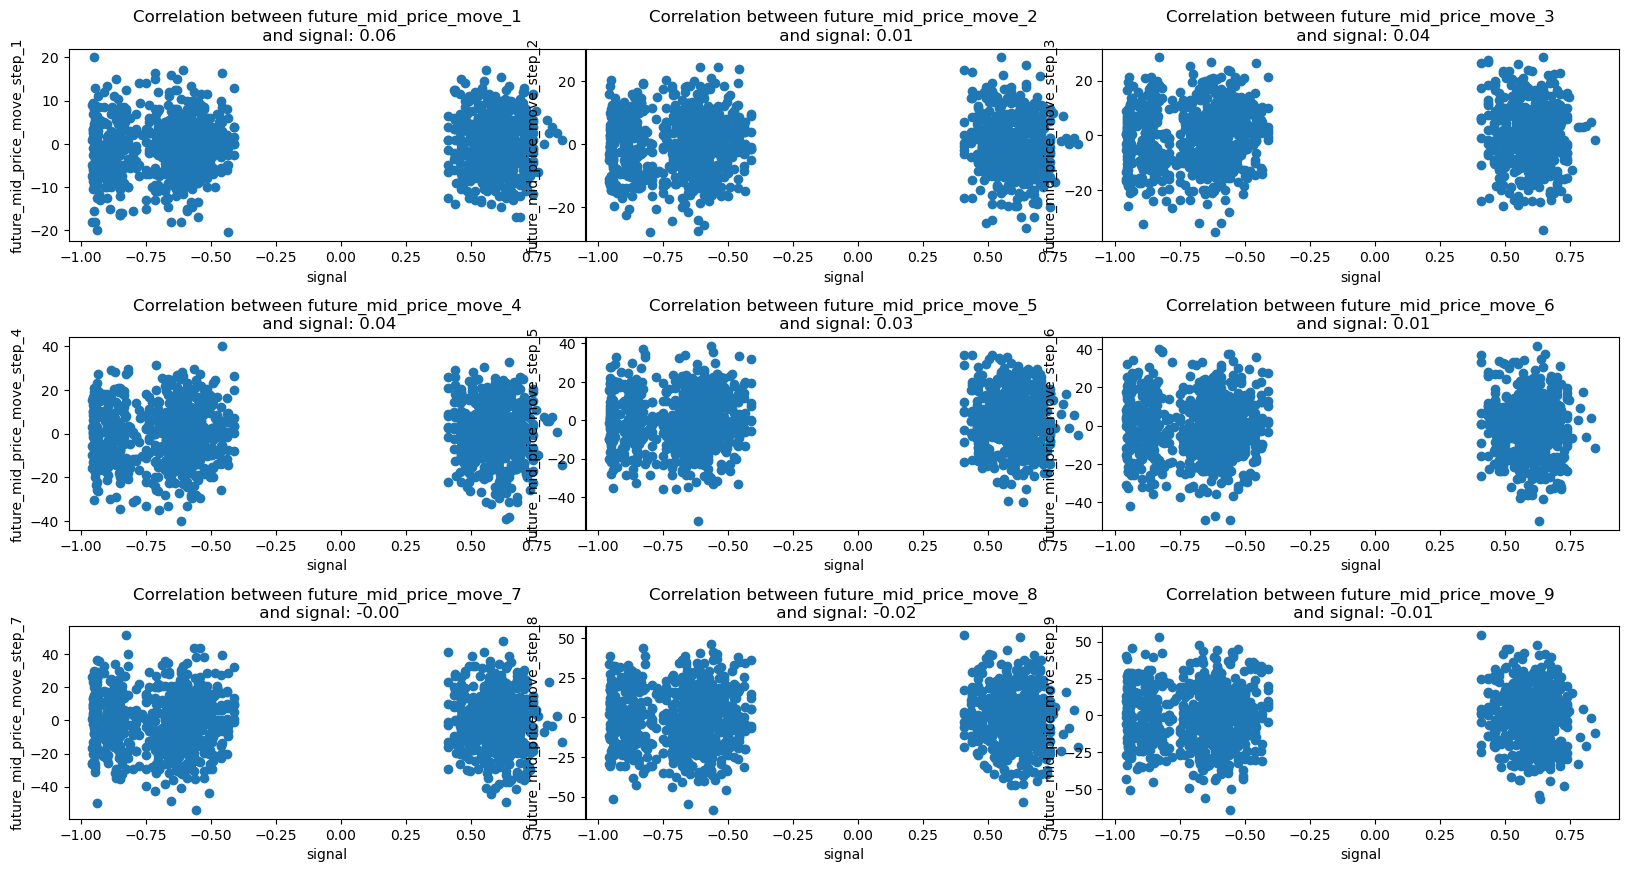

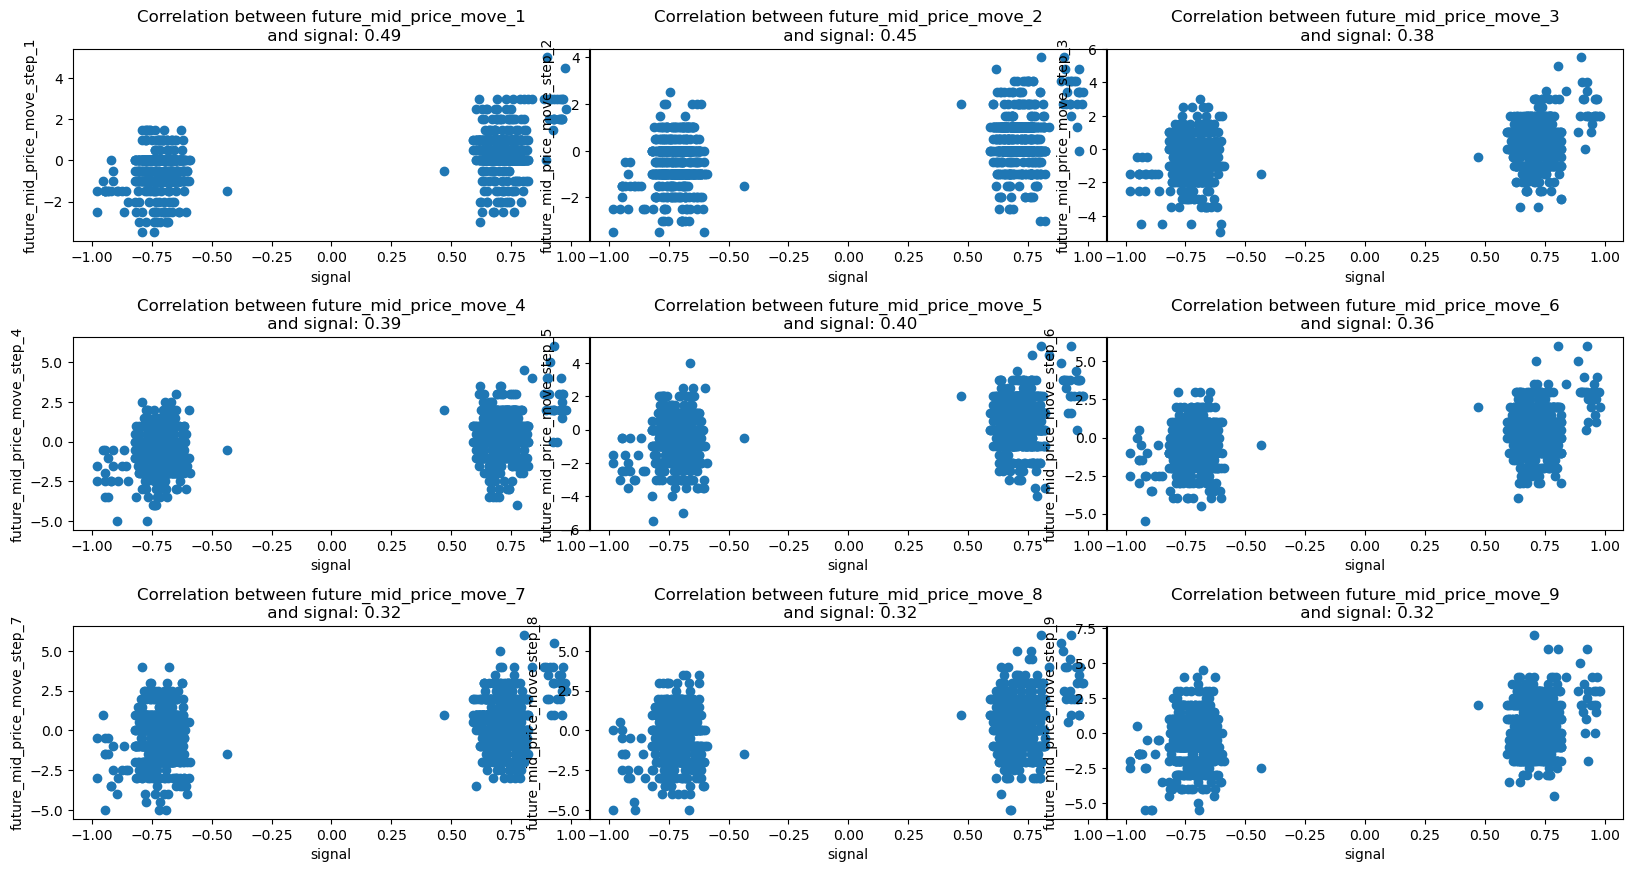

0

In [10]:
r3_w_move[(r3_w_move['imbalance_status']!=10)&(r3_w_move['imbalance_status']!=0)].pipe(plot_em_am, ticker = 'BANANAS', signal = 'volume_imbalance_1')
r3_w_move[(r3_w_move['imbalance_status']!=10)&(r3_w_move['imbalance_status']!=0)].pipe(plot_em_am, ticker = 'PEARLS', signal = 'volume_imbalance_1')
r3_w_move[(r3_w_move['imbalance_status']!=10)&(r3_w_move['imbalance_status']!=0)].pipe(plot_em_am, ticker = 'DIVING_GEAR', signal = 'volume_imbalance_1')
r3_w_move[(r3_w_move['imbalance_status']!=10)&(r3_w_move['imbalance_status']!=0)].pipe(plot_em_am, ticker = 'BERRIES', signal = 'volume_imbalance_1')

In [11]:
r3_w_move.pipe(print_status_count)

DIVING_GEAR
 0     0.481800
 10    0.476533
-1     0.024367
 1     0.017300
Name: imbalance_status, dtype: float64

PEARLS
 0     0.667300
 10    0.172600
 1     0.081833
-1     0.078267
Name: imbalance_status, dtype: float64

COCONUTS
0    1.0
Name: imbalance_status, dtype: float64

BERRIES
 0    0.9610
 1    0.0204
-1    0.0186
Name: imbalance_status, dtype: float64

BANANAS
 10    0.360567
-1     0.286967
 1     0.272833
 0     0.079633
Name: imbalance_status, dtype: float64

DOLPHIN_SIGHTINGS
0    1.0
Name: imbalance_status, dtype: float64

PINA_COLADAS
0    1.0
Name: imbalance_status, dtype: float64



In [12]:
def report_mid_price_diff_by_imbalance_status(df,ticker_cols):
    # report the average mid price difference for each imbalance status
    for ticker in ticker_cols:
        temp = df[df['product'] == ticker]
        print("--------------------")
        print(ticker)
        print(temp.groupby('imbalance_status')['future_mid_price_move_1'].mean())

In [13]:
r3_w_move.pipe(report_mid_price_diff_by_imbalance_status,ticker_cols = ['BANANAS','PEARLS','BERRIES'])

--------------------
BANANAS
imbalance_status
-1    -1.000058
 0    -0.083961
 1     1.063897
 10    0.000185
Name: future_mid_price_move_1, dtype: float64
--------------------
PEARLS
imbalance_status
-1    -2.247658
 0    -0.009916
 1     2.216904
 10    0.005794
Name: future_mid_price_move_1, dtype: float64
--------------------
BERRIES
imbalance_status
-1   -0.531418
 0   -0.002792
 1    0.465686
Name: future_mid_price_move_1, dtype: float64


## Finding alphas for DIVING GEARS and BERRIES

From Tropical TV: 
- when dolphin sights are high, the price of diving gears will go up
- berries has a cycle, grow and ripen in the morning, its taste is the best in mid day, and then it will start to rot in the afternoon


From Wiki:

Position limits for the newly introduced products:

- DIVING_GEAR: 50
- BERRIES: 250

From redbook:



In [14]:
dolphin_sight_mid = r3[r3['product']=='DOLPHIN_SIGHTINGS']['mid_price'].reset_index(drop=True)
diving_gear_mid = r3[r3['product']=='DIVING_GEAR']['mid_price'].reset_index(drop=True)

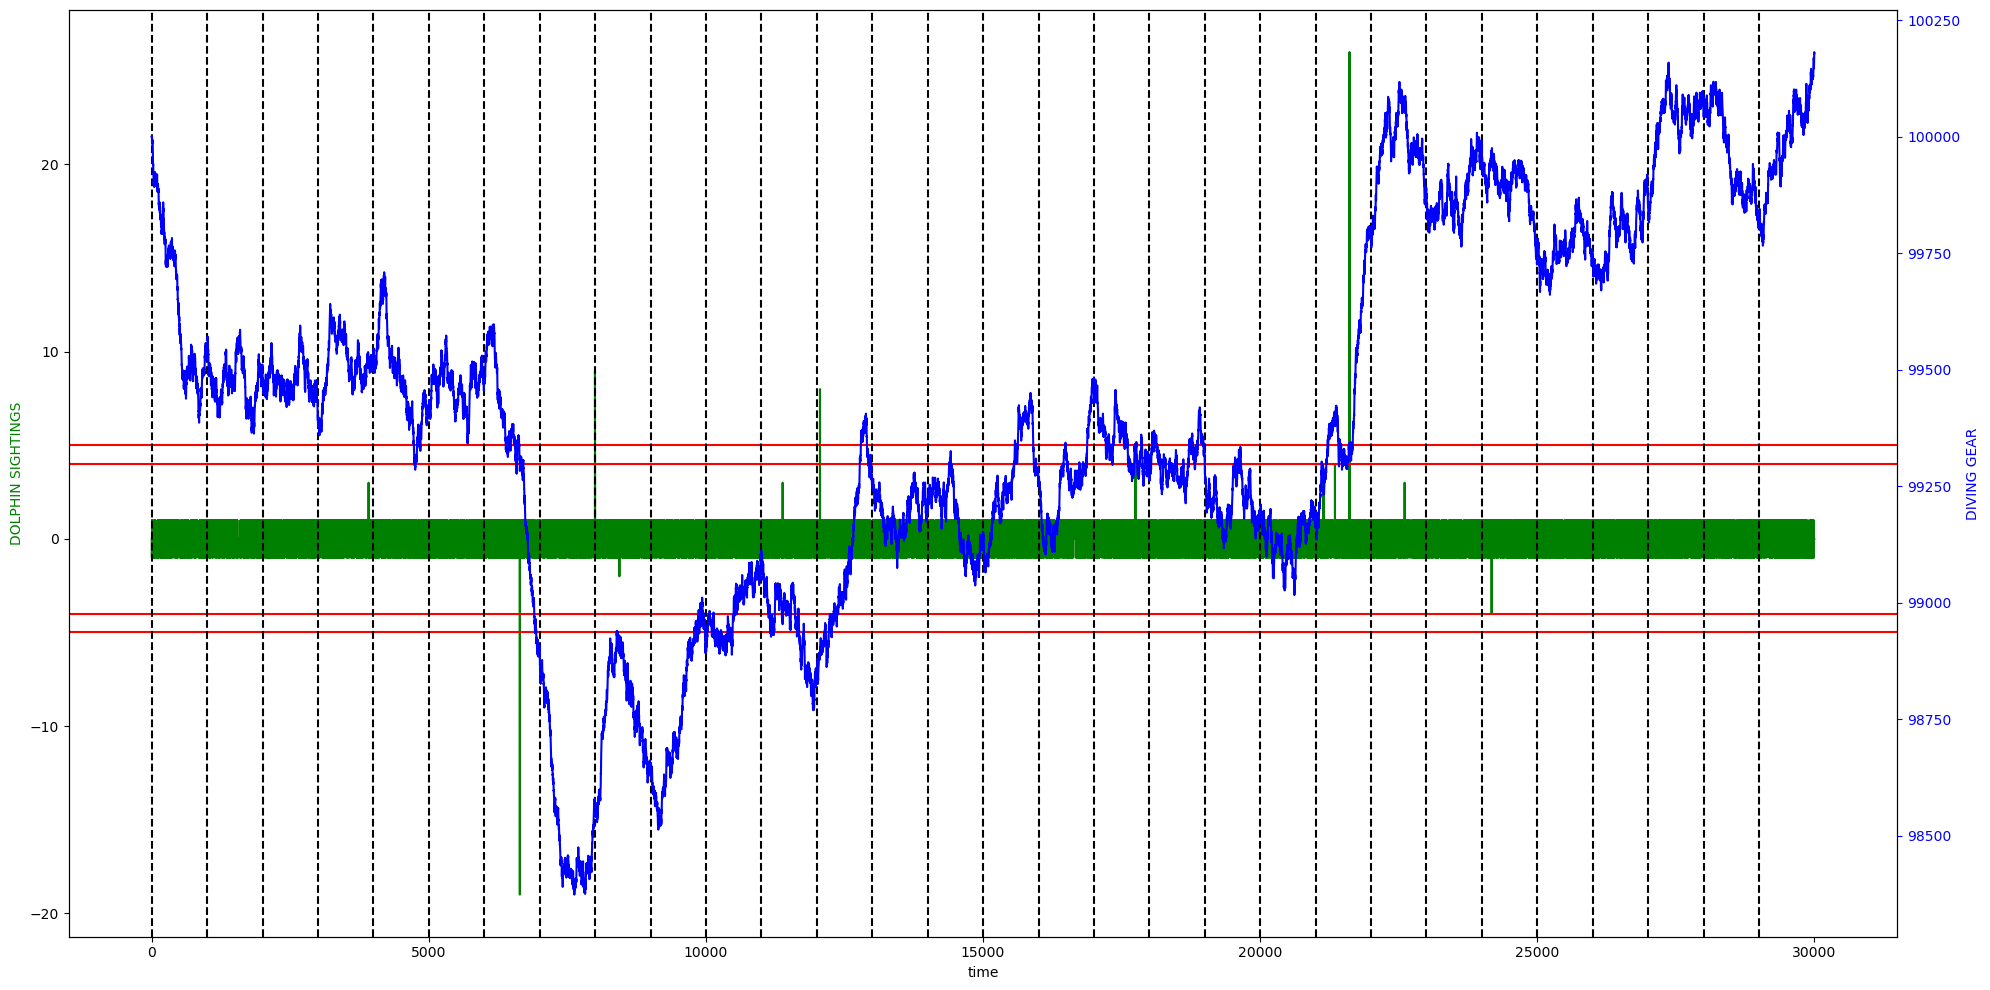

In [15]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(dolphin_sight_mid.diff(),'g')
ax.set_xlabel('time')
ax.set_ylabel('DOLPHIN SIGHTINGS',color='g')
ax.axhline(y=5, color='r', linestyle='-')
ax.axhline(y=4, color='r', linestyle='-')
ax.axhline(y=-5, color='r', linestyle='-')
ax.axhline(y=-4, color='r', linestyle='-')
# plot a vertical line every 1000 ticks
for i in range(0,len(dolphin_sight_mid),1000):
    ax.axvline(x=i, color='k', linestyle='--')
ax2 = ax.twinx()
ax2.plot(diving_gear_mid,'b')
ax2.set_xlabel('time')
ax2.set_ylabel('DIVING GEAR',color='b')
ax2.tick_params('y',colors='b')
fig.tight_layout()
plt.show()


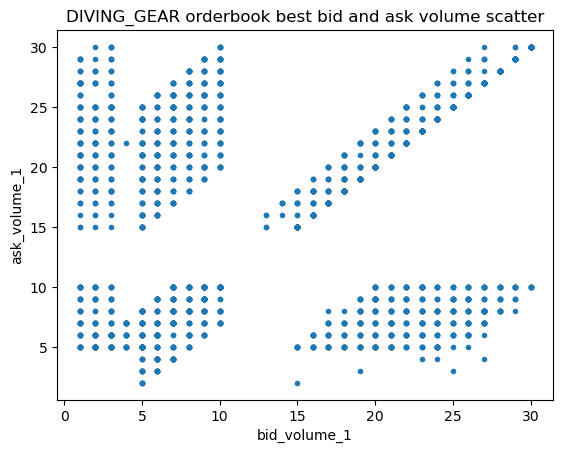

In [16]:
plot_orderbook_dist(r3,'DIVING_GEAR')

<AxesSubplot:>

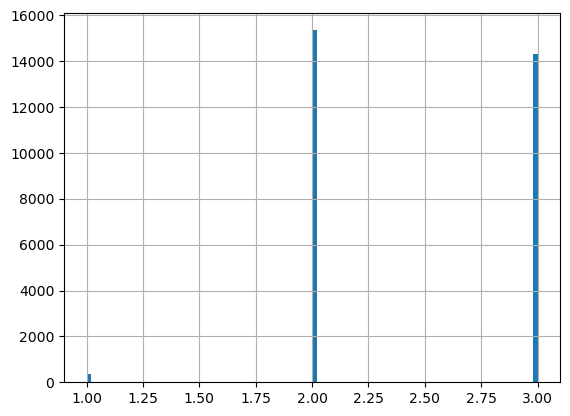

In [17]:
# plot the distribution of the difference between bid and ask price
r3[r3['product']=='DIVING_GEAR'].apply(lambda x: abs(x['bid_price_1']-x['ask_price_1']),axis=1).hist(bins=100)

In [18]:
abs(dolphin_sight_mid.diff())>=5

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: mid_price, Length: 30000, dtype: bool

#### how to trade diving gears
- generate signal the mid_price difference of the dolphin sightings is high(abs(diff)>=5)
- when we have a `buy` signal, we enter max long the diving gears
- `sell` signal, we enter max short the diving gears
- the problem is when we exit?

scenario 1:
- after we max long, we fomd there is a `sell` signal within a certain period of time `t = 1000`, so we just flip the sign

scenario 2:
- after we enter a position, there's no opposite signal within a certain period of time`t=1000`    , so we just exit the position when the time expires


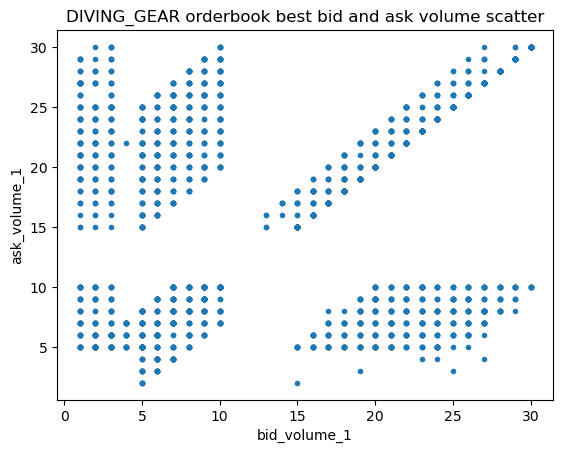

In [19]:
r3.pipe(plot_orderbook_dist,'DIVING_GEAR')